In [1]:
#imports

import numpy as np
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from nltk.stem import WordNetLemmatizer


In [147]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# This notebook will be used for testing different NLP methods, and hyperperameter tuning

In [2]:
df = pd.read_csv('data/finaldf.csv')

In [3]:
#dropping nulls, there was one blank row
df = df.dropna()
df.head()

,title,genre,appid,reviews
0,Counter-Strike: Global Offensive,Action,730,Your team in every random competitive game:\n\...
1,Counter-Strike: Global Offensive,Action,730,Pay $15 to unlock level
2,Counter-Strike: Global Offensive,Action,730,counter-fart: globally offensive scent
3,Counter-Strike: Global Offensive,Action,730,Absolutely garbage servers and net-code for pu...
4,Counter-Strike: Global Offensive,Action,730,[b]Sit down! I will tell you One Thousand and ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10178 entries, 0 to 10179
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    10178 non-null  object
 1   genre    10178 non-null  object
 2   appid    10178 non-null  int64 
 3   reviews  10178 non-null  object
dtypes: int64(1), object(3)
memory usage: 397.6+ KB


In [7]:
#creating reviews list

reviews_list = []
for items in list(df.reviews):
    reviews_list.append(items)

In [8]:
len(reviews_list)

10178

In [9]:
# initializing all vectorizers and models

cv = CountVectorizer(stop_words='english', token_pattern='[a-zA-Z]+', min_df = 3, ngram_range=(1,2))
tfv = TfidfVectorizer(stop_words='english', token_pattern='[a-zA-Z]+', min_df = 3, ngram_range=(1,2))

lsa_model = TruncatedSVD(5)
nmf_model = NMF(5)

cv_doc_word = cv.fit_transform(reviews_list)
tfv_doc_word = tfv.fit_transform(reviews_list)

In [10]:
cvdf = pd.DataFrame(cv_doc_word.toarray(), index=reviews_list, columns=cv.get_feature_names())
cvdf.head(2)

,aa,aaa,aaa games,aaa titles,abandon,abandoned,abandoning,abilities,ability,ability create,...,zombie game,zombie games,zombie survival,zombies,zone,zone s,zones,zoning,zoom,zoomed
Your team in every random competitive game:\n\n- You\n- Russian Guy\n- Another Russian Guy\n- A 6 year old kid who slept with your mother\n- Russian Guy who speaks English\n\n10/10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pay $15 to unlock level,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
tfvdf = pd.DataFrame(tfv_doc_word.toarray(), index=reviews_list, columns=tfv.get_feature_names())
tfvdf.head(2)

,aa,aaa,aaa games,aaa titles,abandon,abandoned,abandoning,abilities,ability,ability create,...,zombie game,zombie games,zombie survival,zombies,zone,zone s,zones,zoning,zoom,zoomed
Your team in every random competitive game:\n\n- You\n- Russian Guy\n- Another Russian Guy\n- A 6 year old kid who slept with your mother\n- Russian Guy who speaks English\n\n10/10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pay $15 to unlock level,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# LSA model for countvectorizer 

In [13]:
lsa_cv_doc_topic = lsa_model.fit_transform(cv_doc_word)


In [14]:
lsa_model.explained_variance_ratio_

array([0.1135443 , 0.08173121, 0.04494811, 0.04153647, 0.0414931 ])

In [170]:
lsa_cv_topic_word = pd.DataFrame(lsa_model.components_.round(3),
             index = ["component_1","component_2", 'component_3', 'component_4', 'componenet_5'],
             columns = cv.get_feature_names())
lsa_cv_topic_word

,aa,aaa,aaa games,aaa titles,abandon,abandoned,abandoning,abilities,ability,ability create,...,zombie game,zombie games,zombie survival,zombies,zone,zone s,zones,zoning,zoom,zoomed
component_1,0.001,0.002,0.001,0.0,0.0,0.001,0.0,0.005,0.007,0.000,...,0.003,0.001,0.001,0.006,0.003,0.0,0.002,0.0,0.001,0.0
component_2,-0.000,-0.001,-0.001,-0.0,-0.0,-0.001,-0.0,-0.003,-0.005,-0.000,...,-0.001,-0.001,-0.000,-0.003,-0.002,-0.0,-0.001,-0.0,-0.000,-0.0
component_3,0.000,-0.000,-0.000,0.0,-0.0,-0.001,-0.0,-0.002,-0.003,-0.001,...,0.002,0.002,0.001,-0.004,-0.001,-0.0,-0.001,-0.0,-0.000,-0.0
component_4,-0.000,-0.002,-0.001,-0.0,-0.0,-0.001,-0.0,-0.005,-0.006,0.000,...,0.003,0.001,0.000,-0.001,-0.003,-0.0,-0.002,-0.0,-0.001,-0.0
componenet_5,0.002,-0.001,-0.001,0.0,-0.0,-0.001,-0.0,-0.003,-0.004,-0.000,...,-0.001,-0.004,-0.001,-0.004,-0.001,-0.0,-0.001,0.0,-0.001,-0.0


In [175]:
lsa_cv_topic_word.loc['component_1']>0

aa             True
aaa            True
aaa games      True
aaa titles    False
abandon       False
              ...  
zone s        False
zones          True
zoning        False
zoom           True
zoomed        False
Name: component_1, Length: 17689, dtype: bool

In [16]:
display_topics(lsa_model, cv.get_feature_names(), 30) #not grea, needs preprocessing


Topic  0
game, s, t, like, b, just, time, play, good, make, really, story, games, don, don t, fun, h, way, td, playing, want, ve, hours, great, people, lot, m, new, played, feel

Topic  1
make, bigger, game build, factory, love game, build, gonna, love, goodbye, gonna say, desert, hurt, make game, make sure, game make, factory grow, play online, russia, lie, big iron, m feeling, hip, make things, iron, heart s, round, lemons, make friends, units, email

Topic  2
td, b, td td, h, tr, th, td tr, tr tr, tr td, th th, tr th, u, url, b b, com, https, b td, td b, th td, list, table, yes, e, wait td, td wait, h e, information, gamer, wait, good

Topic  3
good, yes, yes good, good yes, bad, good good, average, grind, space, bugs, long, price, paint, decent, easy, spare, good game, good replay, replay ability, bigger, graphics, short, beautiful, money, ability, hard, replay, nasa, computer, space space

Topic  4
goat, good, yes, yes good, good yes, simulator, goat simulator, realistic, death, 

# LSA model for TF IDF

In [17]:
lsa_tfv_doc_topic = lsa_model.fit_transform(tfv_doc_word)

In [18]:
lsa_model.explained_variance_ratio_

array([0.00801092, 0.01020486, 0.00679565, 0.00625956, 0.00564048])

In [19]:
lsa_tfv_topic_word = pd.DataFrame(lsa_model.components_.round(3),
             index = ["component_1","component_2", 'component_3', 'component_4', 'componenet_5'],
             columns = tfv.get_feature_names())
lsa_tfv_topic_word

,aa,aaa,aaa games,aaa titles,abandon,abandoned,abandoning,abilities,ability,ability create,...,zombie game,zombie games,zombie survival,zombies,zone,zone s,zones,zoning,zoom,zoomed
component_1,0.001,0.002,0.001,0.0,0.0,0.001,0.0,0.005,0.007,0.000,...,0.003,0.001,0.001,0.006,0.003,0.0,0.002,0.0,0.001,0.0
component_2,-0.000,-0.001,-0.001,-0.0,-0.0,-0.001,-0.0,-0.003,-0.005,-0.000,...,-0.001,-0.001,-0.000,-0.003,-0.002,-0.0,-0.001,-0.0,-0.000,-0.0
component_3,0.000,-0.000,-0.000,0.0,-0.0,-0.001,-0.0,-0.002,-0.003,-0.001,...,0.002,0.002,0.001,-0.004,-0.001,-0.0,-0.001,-0.0,-0.000,-0.0
component_4,-0.000,-0.002,-0.001,-0.0,-0.0,-0.001,-0.0,-0.005,-0.006,0.000,...,0.003,0.001,0.000,-0.001,-0.003,-0.0,-0.002,-0.0,-0.001,-0.0
componenet_5,0.002,-0.001,-0.001,0.0,-0.0,-0.001,-0.0,-0.003,-0.004,-0.000,...,-0.001,-0.004,-0.001,-0.004,-0.001,-0.0,-0.001,0.0,-0.001,-0.0


In [20]:
display_topics(lsa_model, tfv.get_feature_names(), 30)


Topic  0
game, good, good game, s, fun, play, like, t, best, great, just, really, time, games, love, great game, played, best game, story, hours, playing, don, don t, recommend, amazing, ve, friends, fun game, want, pretty

Topic  1
good, good game, game good, pretty good, really good, s good, good good, pretty, game like, good shit, good story, good fun, yes good, story good, good yes, good games, good s, fun good, good time, actually good, roleplay, game recomend, gam, fucking good, good play, coop, super good, just good, rlly, good bad

Topic  2
best, best game, game, played, best games, game played, good game, ve played, game ve, game steam, great game, games, game time, steam, love game, game world, ve, game best, love, games played, amazing, vr game, amazing game, probably best, vr, best vr, best racing, best best, racing game, world

Topic  3
fun, best, best game, fun game, game, game fun, good game, friends, game played, really fun, fun friends, best games, pretty fun, fun pla

### will need lemmatization and increased stop words

# NMF for count vectorization

In [21]:
nmf_cv_doc_topic = nmf_model.fit_transform(cv_doc_word)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [23]:
display_topics(nmf_model, cv.get_feature_names(), 30)


Topic  0
game, s, t, like, just, time, play, really, don, don t, story, games, b, fun, good, way, playing, ve, want, hours, great, people, lot, m, new, played, feel, ll, best, experience

Topic  1
make, bigger, game, love, build, factory, game build, love game, gonna, things, life, feel, just, make game, city, war, say, account, know, sure, tell, ve, want, make sure, like, d, people, list, run, real

Topic  2
td, b, td td, h, tr, th, td tr, tr tr, tr td, th th, tr th, u, url, b b, com, https, b td, td b, th td, list, e, table, td wait, wait td, wait, story, information, h e, gamer, strike

Topic  3
good, yes, yes good, good yes, bad, average, good good, grind, bugs, long, price, just, story, easy, space, paint, decent, graphics, hard, money, hours, good game, good replay, replay ability, spare, h, beautiful, replay, short, ability

Topic  4
goat, simulator, goat simulator, realistic, death, game, worth, hours, fun, games, open, sim, new stuff, simulating, irrational, worth hours, tryi

# NMF for tf idf

In [24]:
nmf_tfv_doc_topic = nmf_model.fit_transform(tfv_doc_word)
display_topics(nmf_model, tfv.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
game, s, t, like, play, just, time, love, really, don, don t, games, hours, playing, story, amazing, recommend, want, people, played, ve, m, make, buy, new, better, way, lot, love game, feel

Topic  1
good, good game, game, game good, pretty good, really good, pretty, s good, game like, good good, really, bad, game fun, good story, yes, good fun, good shit, shit, fun good, story good, good time, yes good, good s, game lot, good games, coop, roleplay, actually good, realistic, relax

Topic  2
best, best game, game, played, best games, game played, games, ve played, ve, vr, game ve, game steam, steam, game time, game world, game best, games played, probably best, world, best vr, vr game, time, racing, best best, best racing, probably, racing game, games ve, im, far

Topic  3
fun, fun game, game fun, friends, really fun, fun friends, pretty fun, really, game, play, s fun, pretty, fun play, play friends, game play, good fun, hours fun, vr, lot, fun fun, fun playing, super fun, re

## trying with less topics

In [25]:
low_nmf = NMF(2)
low_nmf_tfv_doc_topic = low_nmf.fit_transform(tfv_doc_word)
display_topics(low_nmf, tfv.get_feature_names(), 30)


Topic  0
game, s, fun, play, t, like, best, great, just, time, really, games, love, great game, best game, played, story, hours, don, don t, playing, amazing, recommend, ve, friends, fun game, people, want, nice, buy

Topic  1
good, good game, game, game good, pretty good, really good, pretty, s good, game like, good good, really, bad, good story, yes, good fun, game fun, good shit, shit, fun good, story good, good time, good s, yes good, grind, average, good games, coop, game lot, guess, actually good


/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


## trying with more

In [26]:
high_nmf = NMF(10)
high_nmf_tfv_doc_topic = high_nmf.fit_transform(tfv_doc_word)
display_topics(high_nmf, tfv.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
s, t, just, don t, don, time, games, story, really, hours, ve, playing, better, played, m, want, b, way, make, bad, worth, buy, new, ll, gameplay, people, know, life, long, recommend

Topic  1
good, good game, game good, pretty good, really good, pretty, s good, good good, really, game like, bad, good story, yes, story, good shit, good fun, fun good, story good, good time, graphics, shit, grind, good s, yes good, hard, coop, good games, simulation, average, kinda

Topic  2
best, best game, played, best games, games, game played, ve played, ve, vr, game, game ve, game steam, steam, game world, game time, games played, game best, probably best, world, best vr, time, best best, probably, games ve, vr game, racing, d, story, far, best racing

Topic  3
fun, fun game, game fun, really fun, friends, really, pretty fun, fun friends, s fun, pretty, fun play, vr, lot, good fun, hours fun, fun playing, fun fun, lot fun, super fun, hours, recommend, super, playing, lots, fun good, great 

# Pre-processing
adding stop words that carry little signal, and lemmatizing the documents

In [29]:
lemmatizer = WordNetLemmatizer()
stop_words = text.ENGLISH_STOP_WORDS.union(['good', 'great','game','video','play','playing','played','best','really','pretty', 'like'])

In [115]:
# def tokenizer(doc):
#     return TextBlob(doc).correct()

In [30]:
def preprocessor(doc):
    return lemmatizer.lemmatize(doc).lower()

In [31]:
tfv2 = TfidfVectorizer(stop_words=stop_words, token_pattern='[a-zA-Z]{4,}', preprocessor = preprocessor, min_df = 3, ngram_range=(1,3))

In [32]:
tfv2_doc_word = tfv2.fit_transform(reviews_list)

In [33]:
tfv2_doc_topic = high_nmf.fit_transform(tfv2_doc_word)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [34]:
display_topics(high_nmf, tfv2.get_feature_names(), 50)


Topic  0
time, hours, story, recommend, want, make, people, life, worth, need, world, experience, gameplay, hard, feel, know, long, players, things, money, think, years, enjoy, graphics, characters, little, player, different, makes, content, combat, steam, easy, times, going, beautiful, character, music, free, thing, actually, level, real, highly, community, definitely, work, mods, price, masterpiece

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, love story, balls, music, amazing love, childhood, forever, love wait, anymore, love recommend, love hate, remastered, friend, time love, real, makes, review, challenge, wanna, graphics, love graphics, gonna, brings, love challenge, excellent, making, gold, dinosaurs, creative, late, edition, wish, destruction, fantastic, items, heists, love dinosaurs, crazy, come, games love, zombies, monkeys, fell love

Topic  2
nice, nice nice, graphics, nice friends, cars, nice community, racing, nice graphics, ch

In [61]:
# Trying different nmf models with different number of topics, to see when they make the most sense

In [35]:
nmf2 = NMF(2)
nmf3 = NMF(3)
nmf4 = NMF(4)
nmf5 = NMF(5)
nmf6 = NMF(6)

# 2 Topics

In [36]:
doc_topic2 = nmf2.fit_transform(tfv2_doc_word)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [38]:
display_topics(nmf2, tfv2.get_feature_names(), 30)


Topic  0
just, time, games, amazing, hours, story, nice, recommend, friends, better, want, people, make, worth, experience, life, world, feel, gameplay, need, hard, graphics, think, know, things, long, awesome, players, free, years

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, music, love story, balls, amazing love, childhood, forever, love wait, anymore, love recommend, love hate, remastered, makes, friend, real, time love, graphics, review, challenge, wanna, awesome, love graphics, gonna


# 3 Topics

In [39]:
doc_topic3 = nmf3.fit_transform(tfv2_doc_word)
display_topics(nmf3, tfv2.get_feature_names(), 30)


Topic  0
just, time, games, amazing, hours, story, recommend, friends, better, want, people, make, worth, life, experience, world, gameplay, feel, need, think, know, hard, things, graphics, long, players, years, awesome, free, enjoy

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, music, love story, balls, amazing love, childhood, forever, love wait, anymore, love recommend, love hate, remastered, makes, friend, real, time love, graphics, awesome, review, challenge, wanna, love graphics, gonna

Topic  2
nice, friends, nice nice, graphics, nice friends, cars, nice community, nice graphics, racing, chill, community, nice story, recommend, shoot, simulator, feel, nice just, challenging, graphic, community nice, nice people, nice music, hehe, girl, remake, option, hard, recommended, veri, chill nice


/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


# 4 Topics

In [40]:
doc_topic4 = nmf4.fit_transform(tfv2_doc_word)
display_topics(nmf4, tfv2.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
just, time, games, hours, story, friends, recommend, better, want, people, make, worth, life, experience, need, feel, world, gameplay, know, think, hard, things, long, players, awesome, years, free, money, little, enjoy

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, music, love story, balls, amazing love, childhood, forever, love wait, anymore, love recommend, love hate, remastered, makes, friend, graphics, real, time love, review, challenge, wanna, awesome, love graphics, gonna

Topic  2
nice, nice nice, friends, graphics, nice friends, cars, nice community, nice graphics, racing, chill, community, nice story, recommend, shoot, simulator, feel, nice just, challenging, graphic, community nice, nice people, nice music, hehe, girl, remake, option, hard, recommended, cool, veri

Topic  3
amazing, story, cool, graphics, masterpiece, amazing graphics, classic, absolutely, music, amazing story, amazing love, just amazing, amazing experience

# 5 Topics

In [42]:
doc_topic5 = nmf5.fit_transform(tfv2_doc_word)
display_topics(nmf5, tfv2.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
just, time, games, hours, story, recommend, better, want, people, make, worth, life, experience, need, feel, world, gameplay, know, think, hard, long, things, awesome, players, years, money, free, graphics, little, enjoy

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, music, love story, balls, amazing love, childhood, forever, love wait, anymore, love recommend, love hate, remastered, makes, friend, real, graphics, time love, review, challenge, wanna, awesome, love graphics, gonna

Topic  2
nice, nice nice, graphics, nice friends, cars, nice community, racing, nice graphics, chill, community, nice story, recommend, shoot, simulator, feel, nice just, graphic, challenging, community nice, nice people, nice music, girl, hehe, cool, hard, remake, option, recommended, veri, chill nice

Topic  3
amazing, story, cool, graphics, masterpiece, amazing graphics, classic, absolutely, music, amazing story, amazing love, just amazing, amazing experi

# 6 Topics

In [43]:
doc_topic6 = nmf6.fit_transform(tfv2_doc_word)
display_topics(nmf6, tfv2.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
just, time, games, hours, story, recommend, better, want, people, make, life, worth, experience, need, feel, world, gameplay, know, hard, think, long, things, awesome, players, years, free, money, graphics, little, enjoy

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, music, love story, balls, amazing love, childhood, forever, love wait, anymore, love recommend, love hate, remastered, makes, friend, real, graphics, time love, review, challenge, wanna, awesome, love graphics, gonna

Topic  2
nice, nice nice, graphics, nice friends, cars, nice community, racing, nice graphics, chill, community, nice story, recommend, shoot, simulator, feel, nice just, graphic, challenging, community nice, nice people, nice music, girl, hehe, hard, remake, option, recommended, veri, chill nice, open

Topic  3
amazing, story, graphics, masterpiece, amazing graphics, classic, absolutely, music, amazing story, amazing love, just amazing, amazing experience, 

# 20 Topics
Trying the opposite effect, just to see what happens - this has been the most interpretable

In [44]:


nmf20 = NMF(20)
doc_topic20 = nmf20.fit_transform(tfv2_doc_word)
display_topics(nmf20, tfv2.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
people, want, make, world, know, need, feel, players, things, think, years, experience, makes, player, enjoy, steam, different, community, content, mods, actually, little, free, work, thing, going, times, character, does, combat

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, music, love story, amazing love, balls, childhood, forever, love wait, anymore, love recommend, love hate, remastered, friend, graphics, time love, challenge, review, wanna, love graphics, gonna, brings, love challenge, excellent

Topic  2
nice, nice nice, graphics, nice friends, nice community, nice graphics, chill, nice story, cars, community, shoot, simulator, nice just, feel, graphic, community nice, nice people, nice music, hehe, remake, girl, challenging, option, veri, chill nice, recommended, nerd, declare, nice relaxing, open

Topic  3
amazing, graphics, amazing graphics, classic, absolutely, just amazing, amazing love, amazing story, amazing experience, a

# 15 Topics

In [47]:
# less topoics performed worse, lets look at 30!

nmf15 = NMF(15)
doc_topic15 = nmf15.fit_transform(tfv2_doc_word)
display_topics(nmf15, tfv2.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
story, people, want, make, world, worth, gameplay, experience, hard, feel, know, need, characters, think, things, makes, players, money, different, years, player, graphics, combat, enjoy, free, beautiful, content, easy, little, music

Topic  1
love, love love, just love, fucking, hate, absolutely love, worst, absolutely, love story, balls, amazing love, childhood, music, forever, love wait, anymore, love hate, love recommend, friend, remastered, time love, review, challenge, wanna, love graphics, gonna, brings, love challenge, gold, making

Topic  2
nice, nice nice, graphics, nice friends, nice community, cars, nice graphics, racing, chill, nice story, community, shoot, simulator, nice just, feel, graphic, community nice, nice people, hehe, nice music, challenging, girl, remake, option, veri, chill nice, nerd, declare, recommended, nice relaxing

Topic  3
amazing, graphics, amazing graphics, classic, absolutely, amazing story, just amazing, amazing love, amazing experience, a

# 30 Topics
20 was better than 15, so tryin more topics

In [50]:
nmf30 = NMF(30)
doc_topic30 = nmf30.fit_transform(tfv2_doc_word)
display_topics(nmf30, tfv2.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
make, world, feel, things, experience, makes, player, different, think, little, players, actually, mods, times, content, community, combat, free, thing, gameplay, feels, character, level, work, going, know, does, quite, real, overall

Topic  1
love, love love, just love, hate, fucking, absolutely love, worst, absolutely, love story, music, amazing love, childhood, forever, love wait, balls, anymore, love hate, love recommend, remastered, time love, graphics, challenge, review, friend, love graphics, wanna, gonna, love challenge, brings, gold

Topic  2
nice, nice nice, graphics, nice friends, nice community, nice graphics, chill, nice story, cars, shoot, community, simulator, nice just, graphic, community nice, nice people, nice music, girl, hehe, remake, feel, challenging, option, veri, recommended, chill nice, nerd, declare, nice relaxing, nice chill

Topic  3
amazing, graphics, amazing graphics, classic, absolutely, just amazing, amazing love, amazing story, amazing experie

# Adding additional stop words
at this point, we've learned more topics are better than less, with a sweet spot around 20, hoping this will create better defined topics

In [90]:
stop_words = text.ENGLISH_STOP_WORDS.union(['good', 'great','game','video','play','playing','played',
                                            'best','really','pretty', 'like','nice','better','cool',
                                            'just', 'favorite', 'game', 'life', 'recommend'])


tfv3 = TfidfVectorizer(stop_words=stop_words, token_pattern='[a-zA-Z]{4,}', preprocessor = preprocessor, min_df = 3, ngram_range=(1,3))

In [91]:
tfv3_doc_word = tfv3.fit_transform(reviews_list)

## 20 topics

In [78]:
new_doc_topic20 = nmf20.fit_transform(tfv3_doc_word)
display_topics(nmf20, tfv3.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
people, make, world, feel, things, players, think, makes, player, experience, different, free, know, little, real, actually, times, content, thing, going, community, right, combat, character, gameplay, work, feels, level, does, looking

Topic  1
love, love love, fucking, hate, absolutely love, worst, absolutely, love story, music, amazing love, balls, childhood, remastered, forever, love wait, love graphics, graphics, love hate, anymore, time love, challenge, friend, review, gonna, wanna, poggers, mmorpg, brings, love challenge, excellent

Topic  2
friends, games friends, classic, solo, family, poggers, maps, challenging, highly, solo friends, lose, people friends, wolf, kill, gaem, group, enjoyable, dinosaur, compete, dino, want friends, sick, mess, friends enjoy, online, group friends, friends friends, mount, modders, love friends

Topic  3
amazing, graphics, absolutely, amazing graphics, classic, amazing love, amazing story, campaign, absolutely amazing, amazing experience

## 30 topics

In [79]:

new_doc_topic15 = nmf15.fit_transform(tfv3_doc_word)
display_topics(nmf15, tfv3.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
people, want, make, need, know, feel, world, players, think, things, experience, years, mods, makes, player, steam, community, enjoy, different, little, content, actually, real, free, going, thing, work, times, right, does

Topic  1
love, love love, fucking, hate, absolutely love, worst, absolutely, music, love story, amazing love, balls, childhood, remastered, forever, love wait, love graphics, graphics, anymore, love hate, friend, time love, challenge, wanna, gonna, review, mmorpg, poggers, brings, love challenge, real

Topic  2
friends, games friends, classic, solo, family, poggers, maps, challenging, kill, highly, solo friends, gaem, people friends, lose, dino, wolf, group, dinosaur, enjoyable, friends enjoy, want friends, compete, sick, mess, people, online, group friends, friends friends, mount, love friends

Topic  3
amazing, graphics, absolutely, amazing graphics, classic, amazing love, amazing story, campaign, absolutely amazing, amazing experience, music, bored, gra

## 12 topics

In [151]:
nmf12 = NMF(12)
new_doc_topic12 = nmf12.fit_transform(tfv3_doc_word)
display_topics(nmf12, tfv3.get_feature_names(), 30)

/Users/michaelharnett/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "



Topic  0
people, want, make, need, feel, know, world, players, experience, think, things, years, mods, makes, player, community, steam, enjoy, different, content, free, little, real, actually, going, thing, times, work, right, does

Topic  1
love, love love, fucking, hate, absolutely love, worst, absolutely, music, love story, amazing love, balls, childhood, remastered, forever, love wait, love graphics, anymore, love hate, graphics, friend, time love, challenge, wanna, review, gonna, mmorpg, poggers, brings, love challenge, real

Topic  2
friends, games friends, classic, solo, family, poggers, maps, challenging, kill, solo friends, highly, gaem, people friends, lose, dino, wolf, group, enjoyable, dinosaur, people, friends enjoy, want friends, compete, sick, mess, online, group friends, friends friends, mount, love friends

Topic  3
amazing, graphics, absolutely, amazing graphics, classic, amazing love, amazing story, campaign, absolutely amazing, amazing experience, music, bored, gra

TypeError: object of type 'NoneType' has no len()

# Recommendations
Using pairwise distances, I want to take in a query, and find the reviews that most strongly relate to that query, then use the title of the game for that review to make a recommendation

In [93]:
query = ['open world game']

In [94]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

In [113]:
common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])

In [114]:
common

[2251, 8006, 6871, 6012, 3031]

In [115]:
for items in common:
    print(df.iloc[items]['title'])

The Witcher® 3: Wild Hunt
Disco Elysium - The Final Cut
Forza Horizon 4
The Lord of the Rings Online™
The Elder Scrolls V: Skyrim Special Edition


In [118]:
query = ['beautiful']

In [119]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

In [121]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
for items in common:
    print(df.iloc[items]['title'])

Disco Elysium - The Final Cut
Tomb Raider
Outer Wilds
Ori and the Blind Forest
The Witcher® 3: Wild Hunt


In [122]:
query = ['difficult']

In [123]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
for items in common:
    print(df.iloc[items]['title'])

Celeste
Darkest Dungeon®
Dead Cells
The Forest
Blade and Sorcery


In [124]:
query = ['gross']

In [125]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
for items in common:
    print(df.iloc[items]['title'])

DOOM
Hotline Miami
House Flipper
Black Mesa
Foxhole


In [126]:
query = ['fun as fuck']

In [127]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
for items in common:
    print(df.iloc[items]['title'])

Borderlands 2
Shakes and Fidget
Fall Guys: Ultimate Knockout
Hollow Knight
DiRT Rally 2.0


In [128]:
query = ['this is a nonsense sentence']

In [129]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
for items in common:
    print(df.iloc[items]['title'])

Shufflepuck Cantina Deluxe
Black Mesa
The Lord of the Rings Online™
X-Plane 11
Rec Room


In [132]:
query = ['alskdnflasdfasdf']

In [133]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
for items in common:
    print(df.iloc[items]['title'])

Counter-Strike: Global Offensive
Descenders
Descenders
Descenders
Descenders


In [134]:
query = ['what if multiple', 'things are passed']

# Enough copy and pasting
Building a function to test new queries

--this is something that will be cleaned and streamlined once reviewing notebook

In [144]:
def test_query(query):
    '''
    This will take a query, and print the 5 most closely related games to the query, based on the
    pairwise distance to review data. Query MUST be entered as a list.
    '''
    
    fit_query = tfv3.transform(query)
    query_topic = nmf12.transform(fit_query)

    common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
    for items in common:
        print(df.iloc[items]['title'])

In [135]:
fit_query = tfv3.transform(query)
query_topic = nmf12.transform(fit_query)

common = list(pairwise_distances(query_topic, new_doc_topic12, metric = 'cosine').argsort()[0][:5])
for items in common:
    print(df.iloc[items]['title'])

Outer Wilds
RimWorld
Assassin's Creed® Odyssey
Mount & Blade II: Bannerlord
DRAGON BALL Z: KAKAROT


In [137]:
query=['coop']

In [145]:
test_query(['coop'])

Divinity: Original Sin 2 - Definitive Edition
The Witcher® 3: Wild Hunt
To the Moon
Hades
Rhythm Doctor


In [146]:
test_query(['friends'])

Kerbal Space Program
Slime Rancher
The Lord of the Rings Online™
F1® 2020
Dota 2


# Visualizations

In [152]:
wordcloud = WordCloud(width = 800, height = 800,
                text = reviews_list
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10)

SyntaxError: invalid syntax (<ipython-input-152-847b28b9eb9b>, line 3)

In [177]:
topic_word_df = pd.DataFrame(nmf12.components_.round(3),
             index = ["topic_1","topic_2", 'topic_3', 'topic_4',
                      'topic_5', 'topic_6', 'topic_7', 'topic_8',
                     'topic_9', 'topic_10', 'topic_11', 'topic_12'],
             columns = tfv3.get_feature_names())
topic_word_df

,abandon,abandoned,abandoning,abilities,ability,ability create,abit,able,able enjoy,able experience,...,zombie,zombie apocalypse,zombie games,zombie survival,zombies,zone,zones,zoning,zoom,zoomed
topic_1,0.003,0.013,0.003,0.058,0.072,0.005,0.004,0.182,0.006,0.008,...,0.037,0.002,0.000,0.000,0.039,0.036,0.021,0.005,0.009,0.005
topic_2,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,...,0.004,0.000,0.000,0.000,0.015,0.000,0.001,0.000,0.000,0.000
topic_3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.005,0.000,0.000,...,0.008,0.000,0.006,0.002,0.003,0.003,0.001,0.000,0.000,0.000
topic_4,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.000,0.000,...,0.003,0.000,0.000,0.000,0.003,0.000,0.001,0.000,0.000,0.000
topic_5,0.000,0.002,0.000,0.000,0.011,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.001,0.000,0.000
topic_6,0.000,0.001,0.000,0.001,0.000,0.000,0.003,0.001,0.000,0.000,...,0.057,0.005,0.035,0.013,0.000,0.000,0.000,0.000,0.000,0.000
topic_7,0.000,0.000,0.000,0.008,0.010,0.000,0.000,0.004,0.002,0.000,...,0.000,0.001,0.000,0.000,0.031,0.001,0.000,0.000,0.000,0.000
topic_8,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.007,0.000,0.000,...,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
topic_9,0.000,0.000,0.002,0.013,0.007,0.000,0.004,0.006,0.000,0.001,...,0.005,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000
topic_10,0.000,0.000,0.002,0.000,0.003,0.000,0.000,0.005,0.000,0.000,...,0.025,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000


In [178]:
topic_word_df.loc['topic_1']

abandon       0.003
abandoned     0.013
abandoning    0.003
abilities     0.058
ability       0.072
              ...  
zone          0.036
zones         0.021
zoning        0.005
zoom          0.009
zoomed        0.005
Name: topic_1, Length: 12939, dtype: float64

In [189]:
testdf = topic_word_df.T.reset_index()
testdf

,index,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12
0,abandon,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,abandoned,0.013,0.001,0.000,0.000,0.002,0.001,0.000,0.000,0.000,0.000,0.005,0.000
2,abandoning,0.003,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.002,0.002,0.000,0.000
3,abilities,0.058,0.000,0.000,0.000,0.000,0.001,0.008,0.000,0.013,0.000,0.000,0.000
4,ability,0.072,0.000,0.000,0.000,0.011,0.000,0.010,0.008,0.007,0.003,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12934,zone,0.036,0.000,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000
12935,zones,0.021,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
12936,zoning,0.005,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.001
12937,zoom,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [193]:
wordcloudtest = list(testdf[testdf.topic_4>0]['index'])

In [285]:
cloud = WordCloud(width = 2000, height = 2000,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10)

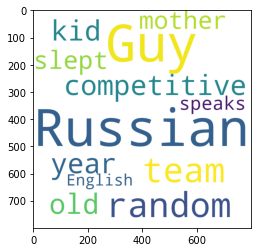

In [206]:
wordcloud.generate(reviews_list[0])
plt.imshow(wordcloud)

In [207]:
wordcloud.to_file(r'/users/michaelharnett/desktop/test.png')

In [219]:
long_string = []

for items in reviews_list[:5]:
    #long_string += items
    print(items)

Your team in every random competitive game:

- You
- Russian Guy
- Another Russian Guy
- A 6 year old kid who slept with your mother
- Russian Guy who speaks English

10/10
Pay $15 to unlock level
counter-fart: globally offensive scent
Absolutely garbage servers and net-code for public game play! This is a high level competitive game in 2021 and Valve has completely lost touch with modern technology. This could be a much better experience for players if Valve would invest some of it's billions back into functioning servers and the community instead of milking it's customers with minimal return when those customers made Valve what they are today. Outdated 64 tic rate on servers, de-synchronization, archaic net-code, and glaring imbalance is commonplace in this game. If you want to play a game that makes you hate yourself almost as much as you hate the tease this game is, go ahead and waste your time playing this game and fooling yourself into thinking skill matters and you'll get better

In [214]:
len(long_string)

3235697

In [218]:
reviews_list[0]# + reviews_list[1]

'Your team in every random competitive game:\n\n- You\n- Russian Guy\n- Another Russian Guy\n- A 6 year old kid who slept with your mother\n- Russian Guy who speaks English\n\n10/10'

In [243]:
new_list = []
for items in reviews_list:
    new_list.append(lemmatizer.lemmatize(items).lower())

In [245]:
together = ''.join(new_list)

In [237]:
import re

In [239]:
together = re.match(r'[a-zA-z]{3,}', together)

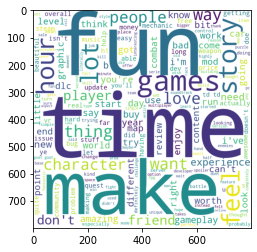

In [247]:
wordcloud.generate(together)
plt.imshow(wordcloud)

In [349]:
genres = list(set(df.genre))
genres


['Racing',
 'Action',
 'Casual',
 'Simulation',
 'Strategy',
 'Indie',
 'Adventure',
 'Massively%20Multiplayer',
 'RPG',
 'Sports']

In [370]:
racing = (list(df[df.genre == 'Racing']['reviews']))
action = (list(df[df.genre == 'Action']['reviews']))
casual = list(df[df.genre == 'Casual']['reviews'])
simulation = list(df[df.genre == 'Simulation']['reviews'])
strat = list(df[df.genre == 'Strategy']['reviews'])
indie = list(df[df.genre == 'Indie']['reviews'])
adventure = list(df[df.genre == 'Adventure']['reviews'])
rpg = list(df[df.genre == 'RPG']['reviews'])
sports = list(df[df.genre == 'Sports']['reviews'])
multiplayer = list(df[df.genre == 'Massively%20Multiplayer']['reviews'])

In [371]:
racing = ''.join(racing)
action = ''.join(action)
casual = ''.join(casual)
simulation = ''.join(simulation)
strat = ''.join(strat)
indie = ''.join(indie)
adventure = ''.join(adventure)
rpg = ''.join(rpg)
sports = ''.join(sports)
multiplayer = ''.join(multiplayer)

In [372]:
joined_list = [[racing], [action], [casual], [simulation], [strat],
               [indie], [adventure], [rpg], [sports], [multiplayer]]
len(joined_list)

10

In [293]:
cloud.generate(racing)

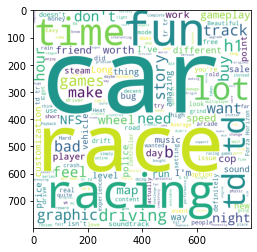

In [295]:
plt.imshow(cloud)

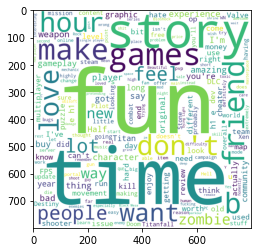

In [363]:
plt.imshow(cloud.generate(action))

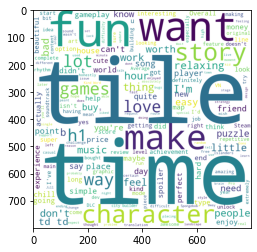

In [378]:
plt.imshow(cloud.generate(casual))

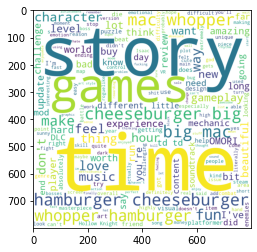

In [379]:
plt.imshow(cloud.generate(indie))

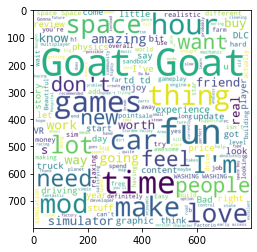

In [380]:
plt.imshow(cloud.generate(simulation))

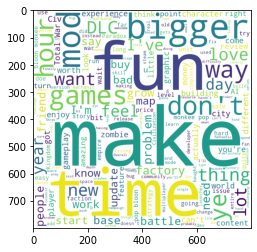

In [381]:
plt.imshow(cloud.generate(strat))

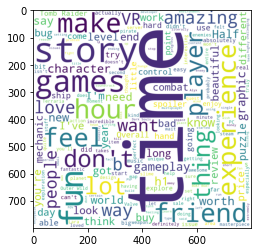

In [382]:
plt.imshow(cloud.generate(adventure))

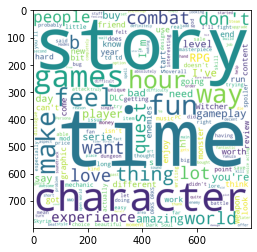

In [383]:
plt.imshow(cloud.generate(rpg))

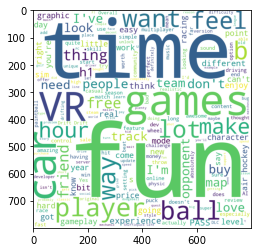

In [384]:
plt.imshow(cloud.generate(sports))

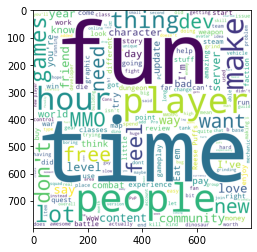

In [385]:
plt.imshow(cloud.generate(multiplayer))

In [396]:
stopwords = STOPWORDS.update(['good', 'great','game','video','play','playing','played','best','really','pretty', 'like'])

In [397]:
cloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10)

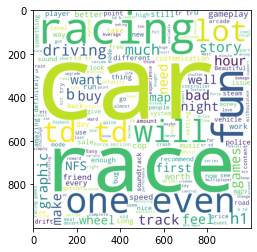

In [398]:
plt.imshow(cloud.generate(racing))

In [ ]:
for i in range(len(joined_list)):
    #plt.imshow(cloud.generate(joined_list[i]))
    print(joined_list[i])